In [6]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# It sets the seed for the random number generator.
np.random.seed(0)

In [7]:
#fixing number of samples at 1500
n_samples = 1500
#making circular, moons, blobs datasets and a no structure dataset
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
#Make a large circle containing a smaller circle in 2d.
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
#Make two interleaving half circles.
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#Generate isotropic Gaussian blobs for clustering.
no_structure = np.random.rand(n_samples, 2), None
#Random values in a given shape. and None for labels

In [8]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# A transformation matrix
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [9]:
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

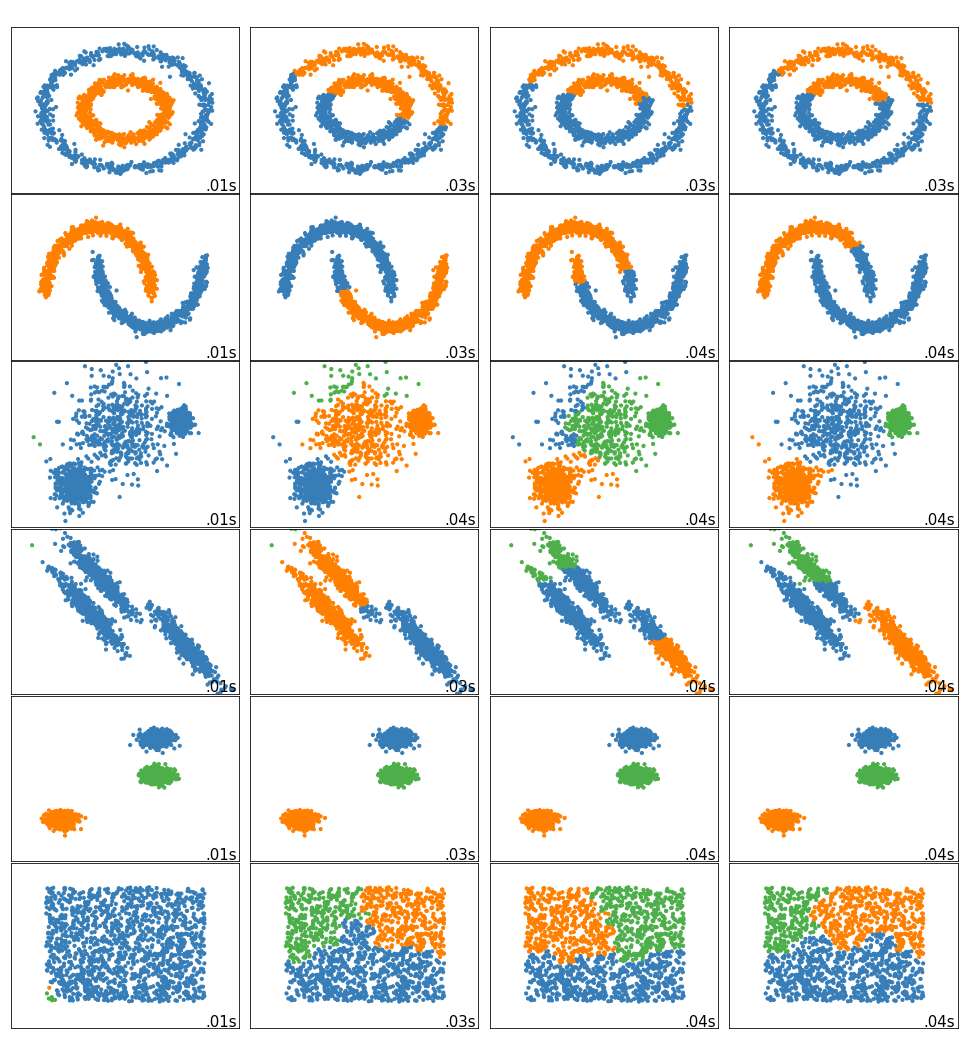

In [11]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

#creating a list of tuples of dataset and their counter in dictionary
datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

#iterating over datasets list
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="average")
    single = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="single")

    # This is a tuple of tuples. The first element of the inner tuple is the name of the algorithm,
    # the second element is the algorithm object.
    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X) #fitting the algo on X

        t1 = time.time()

        #predicting labels for X
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # It creates a grid of plots with len(datasets) rows and len(clustering_algorithms) columns.
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            #color title white
            plt.title(name, size=18, color="white")

        # This is a list comprehension. It is a list of colors that will be used to color the points
        # in the plot.

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ), #cycle runs indefinitely and return from list of colors
                    int(max(y_pred) + 1),   #stop for islice
                )
            )
        )
        # It plots the points in X with their color being defined by the labels in y_pred.
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        # It sets the x and y limits of the plot to [-2.5, 2.5] and removes the ticks.
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        # It prints the time taken by the algorithm to fit the data.
        plt.text(0.99,0.01,("%.2fs" % (t1 - t0)).lstrip("0"),transform=plt.gca().transAxes,size=15,horizontalalignment="right",)
        plot_num += 1

plt.show()
# 1 circle, 2 moons, 3 varied, 4 anisotropic, 5 blobs, 6 no structure